In [4]:
from transformers import CLIPProcessor, CLIPModel

from PIL import Image
import os
import torch
import matplotlib.pyplot as plt

In [5]:
device = "cuda" if torch.cuda.is_available else "cpu"

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

clip_model.eval()

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e-05,

In [8]:
images = []
path = "images"
for image in os.listdir(path):
    raw_image = Image.open(os.path.join(path, image)).convert("RGB")
    images.append(raw_image)

========== ITERATION 1 =============
Scores: tensor([0.1903, 0.4905, 0.3193], device='cuda:0')
Best image score: 0.4904542565345764


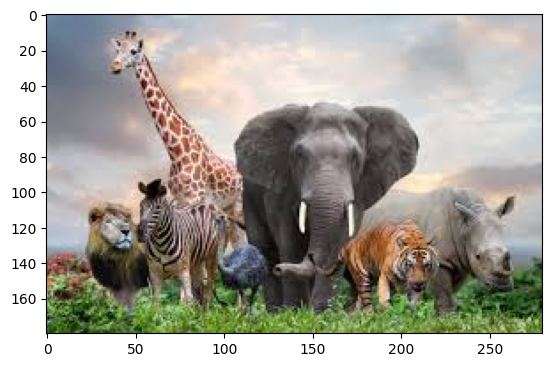

========== ITERATION 2 =============
Scores: tensor([0.1208, 0.5325, 0.3466], device='cuda:0')
Best image score: 0.5325394868850708


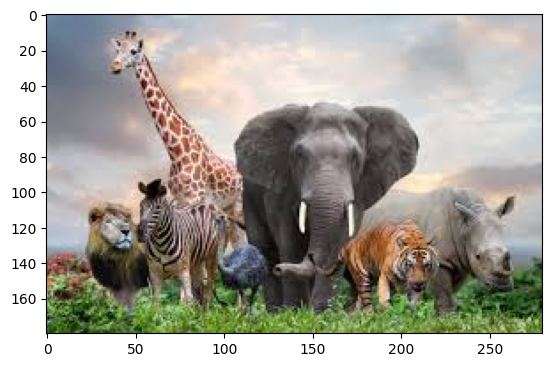

========== ITERATION 3 =============
Scores: tensor([0.1792, 0.3065, 0.5143], device='cuda:0')
Best image score: 0.5142502188682556


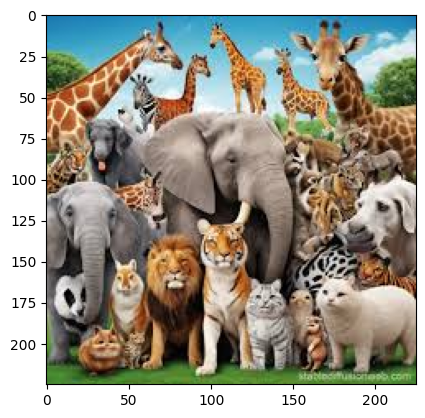

========== ITERATION 4 =============
Scores: tensor([0.1405, 0.2403, 0.6193], device='cuda:0')
Best image score: 0.6192500591278076


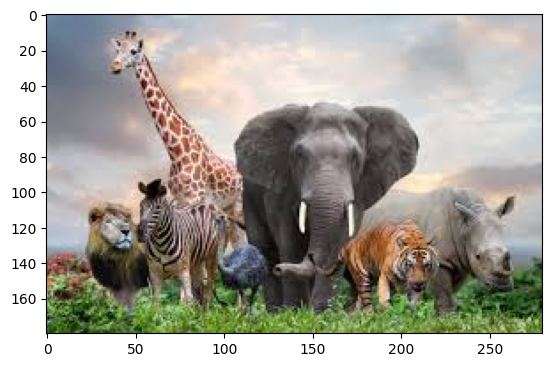

In [19]:
for i in range(len(images)):
    tmp_list = [x for j, x in enumerate(images) if j != i]

    inputs = clip_processor(text="some animals", images=tmp_list, return_tensors="pt", padding="max_length", truncation=True).to(device)

    with torch.no_grad():
        outputs = clip_model(**inputs)
        
    logits_per_image = outputs.logits_per_image

    probs_per_image = logits_per_image.softmax(dim=0).squeeze()
    max_score_idx = torch.argmax(probs_per_image).item()
    best_image = tmp_list[max_score_idx]

    print(f"========== ITERATION {i+1} =============")
    print(f"Scores: {probs_per_image}")
    print(f"Best image score: {probs_per_image[max_score_idx].item()}")

    plt.imshow(best_image)
    plt.show()